https://aleksandarhaber.com/equations-of-motion-of-a-pendulum-on-a-cart-by-using-lagranges-equations/#google_vignette
https://aleksandarhaber.com/animate-dynamics-of-cart-pendulum-system-in-python-by-using-pygame-library/
https://github.com/AleksandarHaber/Simulation-and-Animation-of-Cart-Pole-State-Space-Model-in-Python-and-Pygame

<img src="images/cart_pole-2-1536x1194.png" style="width:50%;">


# 🧱 Model: Inverzní kyvadlo na vozíku

Představ si:

- vozík o hmotnosti \( m_1 \),
- kyvadlo o hmotnosti \( m_2 \) a délce \( l \),
- na vozík působí vnější síla \( F \),
- kyvadlo je spojeno s vozíkem, může se kývat,
- zanedbáme tření.

---

## ⚙️ 1. Rovnice pohybu

Získali jsme tyto dvě rovnice z dynamiky (viz Lagrangeova metoda):

1. Pro vozík (rovnice 4):

$$
(m_1 + m_2)\ddot{x} - m_2 l \cos(\theta) \ddot{\theta} + m_2 l \dot{\theta}^2 \sin(\theta) = F
$$

2. Pro kyvadlo (rovnice 5):

$$
- \cos(\theta) \ddot{x} + l \ddot{\theta} - g \sin(\theta) = 0
$$

---

## 🧮 2. Řešení soustavy rovnic

Z rovnice 2 vyjádříme \( \ddot{\theta} \):

$$
l \ddot{\theta} = \cos(\theta) \ddot{x} + g \sin(\theta)
$$

$$
\Rightarrow \ddot{\theta} = \frac{\cos(\theta) \ddot{x} + g \sin(\theta)}{l}
$$

Dosadíme do rovnice 1:

$$
(m_1 + m_2)\ddot{x} - m_2 l \cos(\theta) \cdot \left( \frac{\cos(\theta) \ddot{x} + g \sin(\theta)}{l} \right) + m_2 l \dot{\theta}^2 \sin(\theta) = F
$$

Zkrátíme \( l \) a roznásobíme:

$$
(m_1 + m_2 - m_2 \cos^2(\theta)) \ddot{x} + m_2 l \dot{\theta}^2 \sin(\theta) - m_2 g \cos(\theta) \sin(\theta) = F
$$

Z toho vyjádříme \( \ddot{x} \):

$$
\ddot{x} = 
\frac{
F + m_2 l \dot{\theta}^2 \sin(\theta) - m_2 g \cos(\theta) \sin(\theta)
}{
m_1 + m_2 - m_2 \cos^2(\theta)
}
$$

Pak dopočítáme \( \ddot{\theta} \) ze vztahu výše.

---

## 🔁 3. Stavové proměnné

Zavedeme:

- \( x_1 = x \) — pozice vozíku,
- \( x_2 = \dot{x} \) — rychlost vozíku,
- \( x_3 = \theta \) — úhel kyvadla,
- \( x_4 = \dot{\theta} \) — úhlová rychlost.

Pak:

$$
\dot{x}_1 = x_2
$$

$$
\dot{x}_2 = 
\frac{
F + m_2 l x_4^2 \sin(x_3) - m_2 g \cos(x_3) \sin(x_3)
}{
m_1 + m_2 - m_2 \cos^2(x_3)
}
$$

$$
\dot{x}_3 = x_4
$$

$$
\dot{x}_4 = \frac{1}{l} \left( \cos(x_3)\dot{x}_2 + g \sin(x_3) \right)
$$

---

## 📤 4. Výstup (např. pozice a úhel)

$$
y =
\begin{bmatrix}
x_1 \\
x_3
\end{bmatrix}
$$

---

## ✅ Finální nelineární stavový model

$$
\begin{aligned}
\dot{x}_1 &= x_2 \\
\dot{x}_2 &= 
\frac{
F + m_2 l x_4^2 \sin(x_3) - m_2 g \cos(x_3) \sin(x_3)
}{
m_1 + m_2 - m_2 \cos^2(x_3)
} \\
\dot{x}_3 &= x_4 \\
\dot{x}_4 &= 
\frac{1}{l} \left( \cos(x_3)\dot{x}_2 + g \sin(x_3) \right)
\end{aligned}
$$

Tento model je **nelineární** kvůli funkcím \( \sin(\theta) \), \( \cos(\theta) \), \( \theta^2 \). Lze ho **linearizovat** pro malé hodnoty \( \theta \approx 0 \).


In [2]:
# import the necessary libraries
# we need numpy since we need to substitute symbolic variables by
# real numbers
import numpy as np
# we need odeint() to integrate the state-space model
from scipy.integrate import odeint
# we need the ploting function
import matplotlib.pyplot as plt
# we import the complete SymPy library to simplify the notation
from sympy import *
# we call this function to enable nice printing of symbolic expressions
init_printing()

In [3]:
# create the symbolic parameter variables
m1,m2,l,g=symbols('m1 m2 l g')
# symbolic force
F=symbols('F')
# state variables
z1,z2,z3,z4=symbols('z1 z2 z3 z4')

# derivatives
dz2, dz4 =symbols('dz2 dz4')

In [4]:
# first equation
e1=(m1+m2)*dz2-m2*l*dz4*cos(z3)+m2*l*(z4**2)*sin(z3)-F
# second equation
e2=l*dz4-dz2*cos(z3)-g*sin(z3)

In [5]:
# define and solve the equations -> Calculate with respect to dz2 and dz4
result=solve([e1, e2], dz2,dz4 , dict=True)

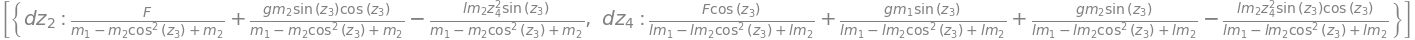

In [6]:
result

In [7]:
# first equation
dz2Solved=simplify(result[0][dz2])

# second equation
dz4Solved=simplify(result[0][dz4])

In [8]:
# define the numerical values of the parameters
lV=1
gV=9.81
m1V=10
m2V=1
# substituted them in the equations
dz2Solved=dz2Solved.subs(l,lV).subs(g,gV).subs(m1,m1V).subs(m2,m2V)
dz4Solved=dz4Solved.subs(l,lV).subs(g,gV).subs(m1,m1V).subs(m2,m2V)

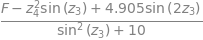

In [9]:
dz2Solved

In [10]:
# create the Python functions that return the numberical values
functionDz2=lambdify([z1,z2,z3,z4,F],dz2Solved)

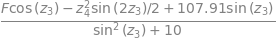

In [11]:
dz4Solved

In [12]:
functionDz4=lambdify([z1,z2,z3,z4,F],dz4Solved)

In [ ]:
def stateSpaceModel(z,t,timePoints,forceArray):
    x, x_dot, theta, theta_dota = z
    # interpolate input force values
    # depending on the current time
    forceApplied=np.interp(t,timePoints, forceArray)
    # NOTE THAT IF YOU KNOW THE ANALYTICAL FORM OF THE INPUT FUNCTION
    # YOU CAN JUST WRITE THIS ANALYTICAL FORM AS A FUNCTION OF TIME
    # for example in our case, we can also write
    # forceApplied=np.sin(t)+np.cos(2*t)
    # and you do not need to specity forceArray as an input to the function
    # HOWEVER, IF YOU DO NOT KNOW THE ANALYTICAL FORM YOU HAVE TO USE OUR APPROACH
    # AND INTERPOLATE VALUES
    # right-side of the state equation
    dz2Value=functionDz2(x,x_dot,theta,theta_dota,forceApplied)
    dz4Value=functionDz4(x,x_dot,theta,theta_dota,forceApplied)
    dxdt=[x_dot,dz2Value,theta_dota,dz4Value]
    return dxdt

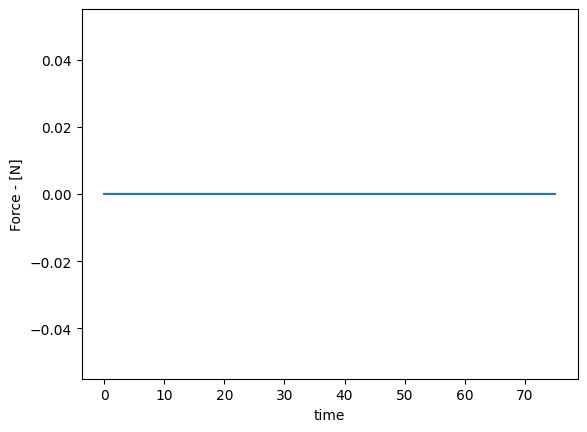

In [ ]:
# define the simulation parameters
startTime=0
endTime=75
timeSteps=15000

# simulation time array
# we will obtain the solution at the time points defined by
# the vector simulationTime
simulationTime=np.linspace(startTime,endTime,timeSteps)

# define the force input
#forceInput = np.sin(simulationTime)+np.cos(2*simulationTime)
forceInput = np.zeros(shape=(simulationTime.shape))

# plot the applied force
plt.plot(simulationTime, forceInput)
plt.xlabel('time')
plt.ylabel('Force - [N]')
#plt.savefig('inputSequence.png',dpi=600)
plt.show()

# define the initial state for simulation
initialState=np.array([0,0,np.pi/3,0])

# generate the state-space trajectory by simulating the state-space model
solutionState=odeint(stateSpaceModel,initialState,
                     simulationTime,
                     args=(simulationTime,forceInput))

# save the simulation data
# the save file is opened by another Python script that is used
# to animate the trajectory
# np.save(f'simulationData.npy', solutionState)

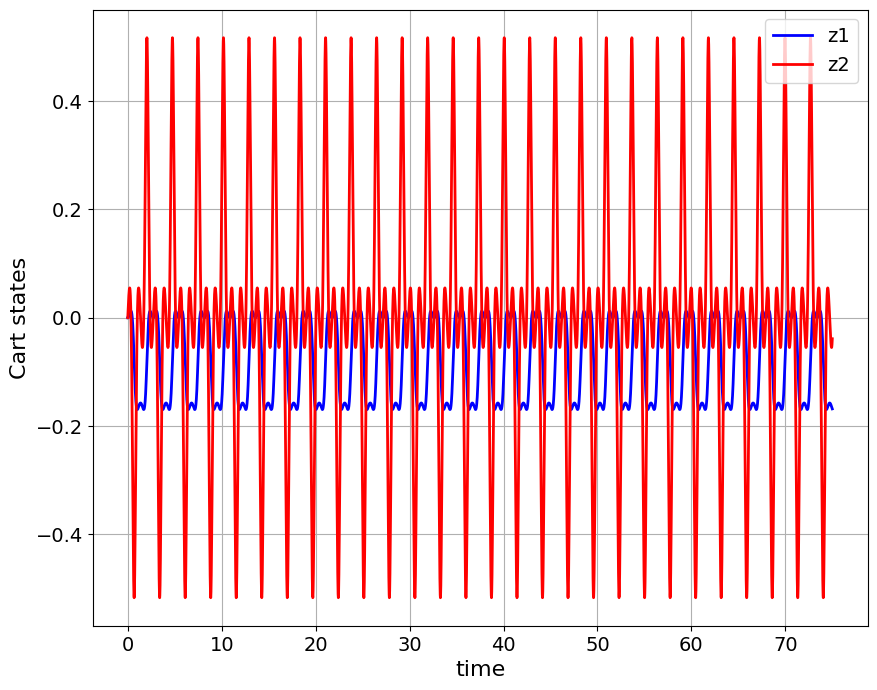

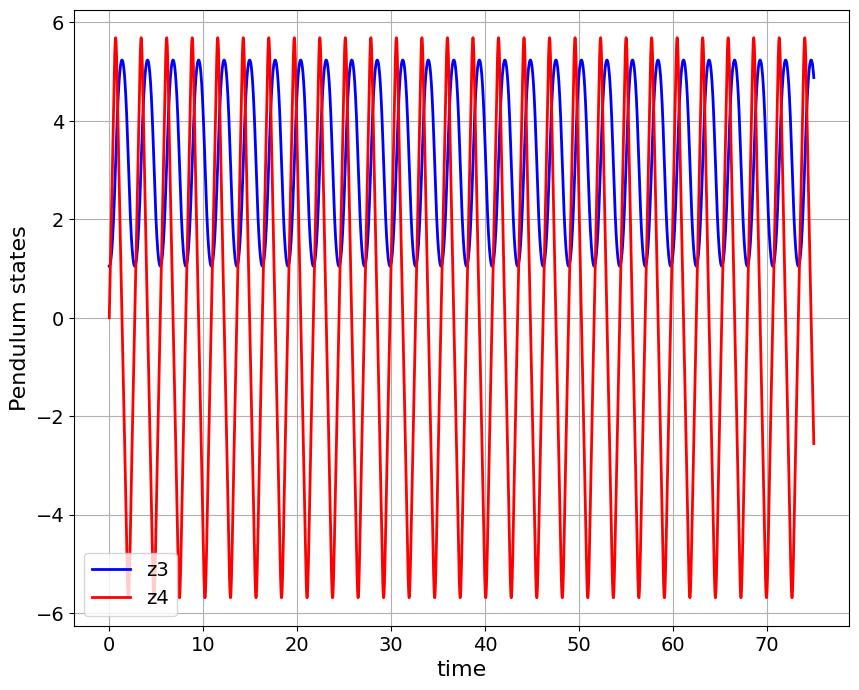

In [15]:
# plot the state trajectories
# cart state trajectories
plt.figure(figsize=(10,8))
plt.plot(simulationTime, solutionState[:,0],'b',linewidth=2,label='z1')
plt.plot(simulationTime, solutionState[:,1],'r',linewidth=2,label='z2')
plt.xlabel('time',fontsize=16)
plt.ylabel('Cart states',fontsize=16)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
#plt.savefig('cartStates.png',dpi=600)
plt.show()

# plot the state trajectories
# pendulum state trajectories
plt.figure(figsize=(10,8))
plt.plot(simulationTime, solutionState[:,2],'b',linewidth=2,label='z3')
plt.plot(simulationTime, solutionState[:,3],'r',linewidth=2,label='z4')
plt.xlabel('time',fontsize=16)
plt.ylabel('Pendulum states',fontsize=16)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
#plt.savefig('pendulumStates.png',dpi=600)
plt.show()

In [ ]:
import pygame
import numpy as np

# Initialise pygame
pygame.init()

# Set window size
size = width, height = 1600, 800
screen = pygame.display.set_mode(size)
# Clock
clock = pygame.time.Clock()


# this is a frame counter
i = 0
# load the simulation data that is computed by simulating the cart-pendulum
# state-space model
solutionArray = solutionState  # np.load(f"simulationData.npy")

# x coordinate of the cart
x = solutionArray[:, 0]
# angle of the pendulum
theta = solutionArray[:, 2]

# here, we need to scale and translate x in order to get x in pixels
maxX = max(x)
minX = min(x)
offsetScreenLimits = 500
lB = offsetScreenLimits
uB = width - offsetScreenLimits
scaleX = (uB - lB) / (maxX - minX)
offsetX = lB - scaleX * minX
x = scaleX * x + offsetX


# geometrical parameters
# ball radius
ballRadius = 40
# cart width and height
cartWidth = 150
cartHeight = 100
# rod length
rodLength = 300
# wheel radius
wheelRadius = 25
# pendulum support bearing
pendulumSupportRadius = 15
# position of the base point of the cart in the y-direction
yPositionCart = 400

# colors
colorRail = (255, 165, 0)
colorCart = (255, 255, 153)
colorBall = (255, 0, 0)
colorWheels = (0, 200, 0)
colorPendulumSupport = (255, 165, 0)
colorRod = (255, 0, 255)

# simulation while loop
while i < len(x):
    # Close window event
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = True

    # Background Color
    screen.fill((0, 0, 0))

    # point C -base point of the cart
    xC = x[i]
    yC = yPositionCart

    # draw the rail
    pygame.draw.line(
        screen,
        colorRail,
        (int(min(x) - 300), int(yC + cartHeight + 2 * wheelRadius)),
        (int(max(x) + 300), int(yC + cartHeight + 2 * wheelRadius)),
        6,
    )

    # draw the cart
    pygame.draw.rect(screen, colorCart, (int(xC - cartWidth / 2), yC, cartWidth, cartHeight))

    # draw the pendulum circle support - rotation support

    pygame.draw.circle(screen, colorPendulumSupport, (int(xC), int(yC)), pendulumSupportRadius)

    # draw the cart wheels
    # left wheel
    pygame.draw.circle(
        screen, colorWheels, (int(xC - cartWidth / 2 + wheelRadius), int(yC + cartHeight + wheelRadius)), wheelRadius
    )
    # right wheel
    pygame.draw.circle(
        screen, colorWheels, (int(xC + cartWidth / 2 - wheelRadius), int(yC + cartHeight + wheelRadius)), wheelRadius
    )

    # draw the rod
    # end point
    xB = xC - rodLength * np.sin(theta[i])
    yB = yC - rodLength * np.cos(theta[i])
    pygame.draw.line(screen, colorRod, (int(xC), yC), (int(xB), int(yB)), 8)

    # draw the ball
    pygame.draw.circle(screen, colorBall, (int(xB), int(yB)), ballRadius)

    pygame.display.flip()
    # introduce a delay
    pygame.time.delay(1)
    # https://www.pygame.org/docs/ref/time.html#pygame.time.Clock.tick
    clock.tick(100)
    i = i + 1

# this is important, run this if the pygame window does not want to close
pygame.quit()
